In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install wordcloud
!pip install sentence_transformers 
!pip install sklearn
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
import string
import collections
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import regexp_tokenize,RegexpTokenizer
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer, DecisionTreeClassifier

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.corpus import sentiwordnet
from sentence_transformers import SentenceTransformer, models

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import datetime
datetime.datetime.strptime
import plotly.graph_objects as go


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
stopwordss = stopwords.words('english')
punctuationss = string.punctuation

special_chars=[]
special_chars.append("''")
special_chars.append('``')
special_chars.append('’')
special_chars.append('–')
special_chars.append('“')
special_chars.append('”')
special_chars.append('...')
special_chars.append('https')
special_chars.append('via')

In [ ]:
def read(name):
    data = pd.read_csv(name)
    data = pd.DataFrame(data)
    df = data[['id','full_text','created_at','lang']]
    df_filtered = df[df['lang'] == 'en']
    return(df_filtered)

def words_func(sentence):
  tokenizer = RegexpTokenizer(r'\w+')
  temp = list()
  for word in word_tokenize(sentence):
    if word not in stopwordss and word not in punctuationss and word not in special_chars:
      temp.append(word.lower())
  return temp

def stem(sentence):
  stemmer = PorterStemmer()
  temp = list()
  for word in word_tokenize(sentence):
    temp.append(stemmer.stem(word.lower()))
  return temp

def vocabulary(sentences):
  vocabulary = dict()
  for sentence in sentences:
    sentence1=words_func(sentence)
    for word in sentence1:
      if word not in vocabulary.keys():
        vocabulary[word] = 1
      else:
        value = vocabulary.get(word)
        value+=1
        vocabulary[word]=value
  return Convert(sorted(vocabulary.items(), key=lambda x: x[1],reverse=True))

def Convert(tup): 
    di = dict(tup) 
    return di 

def wc(vocab):
  words = list(vocab.keys())[:20]
  comment_words = ""
  comment_words += " ".join(words)+" "
  return comment_words

def word_cloud(vocab_fake, vocab_real):
  words_fake = wc(vocab_fake)
  words_real = wc(vocab_real)

  wordcloud = WordCloud().generate(words_fake)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

  wordcloud = WordCloud().generate(words_real)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

def get_vocabs(fake,real):
  fake_text = fake['full_text'].tolist()
  real_text = real['full_text'].tolist()
  vocab_fake = vocabulary(fake_text)
  vocab_real = vocabulary(real_text)
  return vocab_fake, vocab_real

def get_vocab(together):
  text = together['full_text'].tolist()
  vocab = vocabulary(text)
  return vocab

def get_df_month(fake,real,date1,date2):
  df1 = fake[(fake['created_at'] > date1 ) & (fake['created_at'] <= date2)]
  df2 = real[(real['created_at'] > date1 ) & (real['created_at'] <= date2)]
  return df1, df2

def remove_covid_words(fake,real):
  covid_words = ('coronavirus', 'covid-19', 'covid19', 'covid')
  for key in covid_words:
    if key in fake: 
      del fake[key]

  for key in covid_words:
    if key in real:
      del real[key]
  return fake,real

def remove_covid_words(together):
  covid_words = ('coronavirus', 'covid-19', 'covid19', 'covid','i','a','the','children', 'what')
  for key in covid_words:
    if key in together: 
      del together[key]
  return together

def get_first_by_month(fake,real,date1,date2):
  fake,real = get_df_month(fake,real,date1,date2)
  together = fake.append(real, ignore_index=True)
  vocab_together = get_vocab(together)
  vocab_together = remove_covid_words(vocab_together)
  print(vocab_together)
  return list(vocab_together.keys())[0],list(vocab_together.values())[0]

def get_number_of_tweets(fake,real,date1,date2):
  fake,real = get_df_month(fake,real,date1,date2)
  together = fake.append(real, ignore_index=True)
  return len(together.index)

def prepare_data(fake,real):
  together = fake.append(real, ignore_index=True)
  return together[['full_text','class']]
  



In [ ]:
fake = read('/content/gdrive/MyDrive/NLP Project/fake.csv')
print(fake['full_text'])
fake['class']='0'
print(fake)

0       Excellent, devastating story. Anyone who says ...
1       Had a grown man today tell me: \n1. He refuses...
2       #IsAMassiveUnderstatement \ncovid 19 is just l...
3       just had an encounter with the most ignorant c...
4       'We Are Not A Communist Nation': Rally Organiz...
                              ...                        
7783    One physician from Texas says “we have a cure ...
7784    This week the CDC quietly updated the COVID-19...
7785    Is this true??\n\nThe #CDC quietly updated the...
7786    There is a cure for covid-19.the China virus i...
7787    Out of curiosity \n\nWould you take a vaccine ...
Name: full_text, Length: 7089, dtype: object
                       id  ... class
0     1254923219359936500  ...     0
1     1256064242572300300  ...     0
2     1253183292947550200  ...     0
3     1252636346134356000  ...     0
4     1252607413846491100  ...     0
...                   ...  ...   ...
7783  1287912887705653200  ...     0
7784  130028319325024

In [ ]:
real = read('/content/gdrive/MyDrive/NLP Project/real.csv')
print(real['full_text'])
real['class']='1'
print(real)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning:

Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.



0         PRAISE THE LORD:\n\nFDA approves remdesivir tr...
1         How the Aging Process Makes Older People More ...
2         Previous infection with other types of coronav...
3         Republicans don't want to get a COvid-19 vacci...
4         James Bond actor Sir Sean Connery dies at the ...
                                ...                        
136214    If you’re living with or affected by HIV, here...
136215    Atlanta Mayor Keisha Lance Bottoms tests posit...
136216    Atlanta Mayor Keisha Lance Bottoms Tests Posit...
136217    Symptom Profiles of a Convenience Sample of Pa...
136218    NotFakeNews: New Zealand let health experts” r...
Name: full_text, Length: 132032, dtype: object
                         id  ... class
0       1319647037218979800  ...     1
1       1304894428092526600  ...     1
2       1313811707383492600  ...     1
3       1306319911019360300  ...     1
4       1322538412474208300  ...     1
...                     ...  ...   ...
136214  128160272534

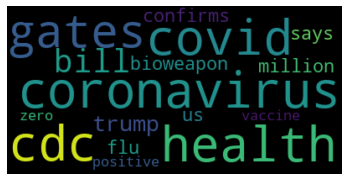

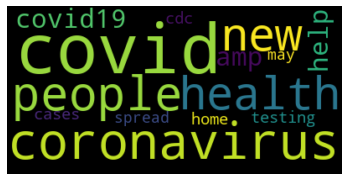

In [ ]:
vocab_fake,vocab_real = get_vocabs(fake,real)
word_cloud(vocab_fake,vocab_real)

In [ ]:
top_words = []
frequency = []

start_dates = ['2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01',
              '2020-06-01','2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01']
end_dates = ['2020-01-31','2020-02-29','2020-03-31','2020-04-30','2020-05-31',
              '2020-06-30','2020-07-31','2020-08-31','2020-09-30','2020-10-31','2020-11-30','2020-12-31']

for i in range (0,10):
  k,v = get_first_by_month(fake,real,start_dates[i],end_dates[i])
  top_words.append(k)
  frequency.append(v)
                                                                  
print(top_words)
print(frequency)


{'china': 454, 'flu': 357, 'u.s.': 329, 'case': 321, '3': 304, 'ago': 299, 'amp': 297, 'months': 267, 'million': 263, '65': 259, 'cdc': 252, 'novel': 246, 'in': 242, 'to': 226, 'bill': 225, 'gates': 225, 'deaths': 221, 'new': 221, 'foundation': 215, 'others': 209, 'melinda': 203, 'via': 201, 'predicted': 200, 'simulation': 200, 'ran': 200, 'up': 199, 'second': 195, 'confirms': 194, 'first': 184, 'wuhan': 178, 'rate': 166, 'virus': 156, 'health': 149, 'that': 148, 'spread': 142, "'s": 134, 'people': 131, 'infection': 129, 'education': 128, 'this': 127, 'confirmed': 127, 'could': 126, 'institutes': 123, 'know': 121, 'year': 120, 'officials': 115, 'higher': 115, 'recently': 114, 'breaking': 112, 'help': 112, 'get': 110, 'study': 108, 'outbreak': 106, 'shot': 105, 'emerged': 102, 'why': 99, 'deadly': 99, 'influenza': 96, 'here': 91, 'you': 88, '—': 88, 'early': 86, 'points': 82, 'those': 81, '15': 81, 'fatality': 81, 'exposed': 81, 'lancet': 81, 'exercise': 80, 'hits': 80, '83': 80, 'publi

In [ ]:
months = ['January', 'February', 'March','April','May','June','July',
                 'August','September','October']
                 
fig = go.Figure(data=[go.Table(header=dict(values=['Month', 'Word','Frequency']),
                 cells=dict(values=[months, top_words, frequency]))
                     ])
fig.update_layout(width=500, height=500)
fig.show()

In [ ]:
number_of_tweets = []
for i in range (0,10):
  number_of_tweets.append(get_number_of_tweets(fake,real,start_dates[i],end_dates[i]))

print(number_of_tweets)
y_pos = np.arange(len(months))
plt.figure(figsize=(10, 6))
plt.bar(y_pos, number_of_tweets, align='center', alpha=0.5)

plt.xticks(y_pos, months)
plt.ylabel('Usage')
plt.title('Number of tweets depending on the month')

plt.show()

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

fake_data=fake['full_text'].tolist()
real_data=real['full_text'].tolist()[:len(fake_data)]

def return_sentiments(dataset):
  positive_count = 0
  negative_count = 0
  neutral_count = 0

  sia = SentimentIntensityAnalyzer()
  
  for sentence in dataset:
      print(f'For the sentence "{sentence}"')
      polarity = sia.polarity_scores(sentence)
      score = polarity["compound"]
      print(score)

      if polarity['compound'] >= 0.05 : 
          print("Positive") 
          positive_count+=1
    
      elif polarity['compound'] <= - 0.05 : 
          print("Negative")
          negative_count+=1
    
      else : 
          print("Neutral") 
          neutral_count+=1
    
      # pos = polarity["pos"]
      # neu = polarity["neu"]
      # neg = polarity["neg"]
      # print()

      # print(f'The percententage of positive sentiment is : {round(pos*100,2)} %')
      # print(f'The percententage of neutral sentiment is : {round(neu*100,2)} %')
      # print(f'The percententage of negative sentiment is : {round(neg*100,2)} %')
      # print()

      # sentiments = {'Positive': pos, 'Neutral': neu, 'Negative': neg }
      # emotion = max(sentiments, key=sentiments.get)
      # print(emotion, 'statement')

      print("="*50)


  print("Positive")
  print(positive_count)

  print("Negative")
  print(negative_count)

  print("Neutral")
  print(neutral_count)

  stats=list()
  stats.append(positive_count)
  stats.append(neutral_count)
  stats.append(negative_count)
  return stats


fake_stats = return_sentiments(fake_data)



Streaming output truncated to the last 5000 lines.
@ProjectLincoln @JoeBiden @DNC @TomSteyer @PeteButtigieg @TheDemocrats @Alyssa_Milano @DemGovs @GOPGovs @SenateDems @ChrisJZullo"
-0.673
Negative
For the sentence "Trump on coronavirus testing: ‘If we stopped testing right now, we’d have very few cases, if any’ https://t.co/Fpmqz42DIG  And if you stopped speaking you wouldn't sound like a Moron . @realDonaldTrump"
-0.797
Negative
For the sentence "Trump on coronavirus testing: ‘If we stopped testing right now, we’d have very few cases, if any’ 🤣🤣🤣
https://t.co/I9iPaKMKtm"
0.8271
Positive
For the sentence "Seriously? Hope this statement was a joke, my 6 year old granddaughter is smarter than this!
Trump on COVID-19 testing: ‘If we stopped testing right now, we’d have very few cases, if any’ https://t.co/rjqaO1iFg1"
0.6996
Positive
For the sentence "hey you stole our bit! you bit biter! -- “If you don’t test, you don’t have any cases. If we stopped testing right now, we’d have very few c

In [ ]:
real_stats = return_sentiments(real_data)

In [ ]:
positives = []
neutrals = []
negatives = []

positives.append(fake_stats[0])
positives.append(real_stats[0])

neutrals.append(fake_stats[1])
neutrals.append(real_stats[1])

negatives.append(fake_stats[2])
negatives.append(real_stats[2])

barWidth = 0.25
 
bars1 = positives
bars2 = neutrals
bars3 = negatives
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(6,6))

plt.bar(r1, bars1, color='#006400', width=barWidth, edgecolor='white', label='Positive')
plt.bar(r2, bars2, color='#ffa500', width=barWidth, edgecolor='white', label='Neutral')
plt.bar(r3, bars3, color='#a40000', width=barWidth, edgecolor='white', label='Negative')
 

plt.xlabel('Number of positive, neutral and negative COVID-19 tweets')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Fake', 'Real'])
 
plt.legend()
plt.show()


In [ ]:
data = prepare_data(fake,real)
from sklearn.utils import shuffle
data = shuffle(data)

print(data)

X = data['full_text'].tolist()[:100]
Y = data['class'].tolist()[:100]


Vizualize: number of tweets per month (real/fake)
most used word - table 

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-distilroberta-base-v1')

sentences=X

embeddings = model.encode(X)

for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", len(embedding))
    print("")

print (embeddings[0])

In [ ]:
classes = []
for entry in Y:
  classes.append(np.array(int(entry)))
Y =  classes
Y = np.array(Y)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X_Train, X1, Y_Train, Y1 = train_test_split(embeddings, Y, test_size=0.2, shuffle=True)
X_Test, X_Validate,Y_Test, Y_Validate = train_test_split(X1,Y1,test_size=1/2,shuffle=True)

print(len(X_Train))
print(len(Y_Train))
print(len(X_Test))
print(len(Y_Test))
print(len(X_Validate))
print(len(Y_Validate))

In [ ]:
print(np.shape(X_Train))
print(np.shape(Y_Train))


print(np.shape(X_Validate))
print(np.shape(Y_Validate))

print(np.shape(X_Test))
print(np.shape(Y_Test))


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report

X_Train = X_Train.reshape(-1, 1, 768)
X_Test = X_Test.reshape(-1, 1, 768)
X_Validate = X_Validate.reshape(-1, 1, 768)
Y_Train = Y_Train.reshape(-1, 1, 1)
Y_Test = Y_Test.reshape(-1, 1, 1)
Y_Validate = Y_Validate.reshape(-1, 1, 1)


def get_lstm_model():
    inputs = keras.Input(shape=(None, 768))
    lstm = tf.keras.layers.LSTM(4, return_sequences=True, return_state=False)(inputs)
    x = layers.Dense(64, activation='relu')(lstm)
    outputs = keras.layers.Dense(2,activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mean_squared_error",metrics="accuracy")
    return model

model_lstm1 = get_lstm_model()
model_lstm1.summary()

model_lstm1.fit(X_Train,Y_Train, epochs=20,batch_size = 10,validation_data=(X_Validate,Y_Validate))

out = model_lstm1.predict(X_Test)
y_classes = out.argmax(axis=-1)
# print(y_classes)
print(Y_Test)
predictions = y_classes.reshape(-1, 1, 1)

print(predictions)
# print(type(predictions[0][0][0]))
# print(type(Y_Test[0][0][0]))

print("RMS: %r " % np.sqrt(np.mean((predictions - Y_Test) ** 2)))

